In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('Spam_SMS.csv')

In [4]:
df.sample(5)

,Class,Message
960,ham,Where @
4314,ham,"I wasn't well babe, i have swollen glands at m..."
45,ham,No calls..messages..missed calls
2996,ham,Mm not entirely sure i understood that text bu...
618,ham,For my family happiness..


In [5]:
df.shape

(5574, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# drop last 3 columns
df.drop(columns=['Class ','Message '],inplace=True)

KeyError: "['Class ', 'Message '] not found in axis"

In [10]:
df.sample(5)

,Class,Message
5318,ham,Jus finish watching tv... U?
3926,ham,As if i wasn't having enough trouble sleeping.
3020,ham,Wat time do u wan 2 meet me later?
3649,ham,As per your request 'Maangalyam (Alaipayuthe)'...
777,ham,Why don't you go tell your friend you're not s...


In [11]:
# renaming the columns
df.rename(columns={'Class':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
2852,ham,Are you going to wipro interview today?
982,ham,Reckon need to be in town by eightish to walk ...
3144,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...
4832,ham,Po de :-):):-):-):-). No need job aha.
2450,ham,Then she dun believe wat?


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

415

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5159, 2)

In [ ]:
# EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

0    4518
1     641
Name: target, dtype: int64

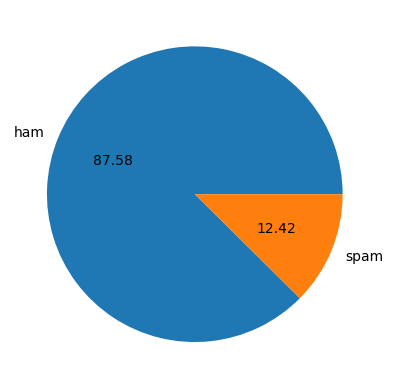

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced 

In [23]:
import nltk

In [24]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Nandni
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters']=df['text'].apply(len)

C:\Users\Nandni Raj\AppData\Local\Temp\ipykernel_1244\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [40]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Nandni Raj\AppData\Local\Temp\ipykernel_18172\1624022670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [34]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [35]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Nandni Raj\AppData\Local\Temp\ipykernel_1244\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [36]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [37]:
df[['num_characters','num_words','num_sentences']].describe()

KeyError: "['num_words'] not in index"

In [43]:
# Ham msges
#df[df['target']==0][['num_characters','num_words','num_sentences']].describe()
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()


KeyError: "['num_words'] not in index"

In [41]:
# spam msges
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


KeyError: "['num_words'] not in index"

In [44]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

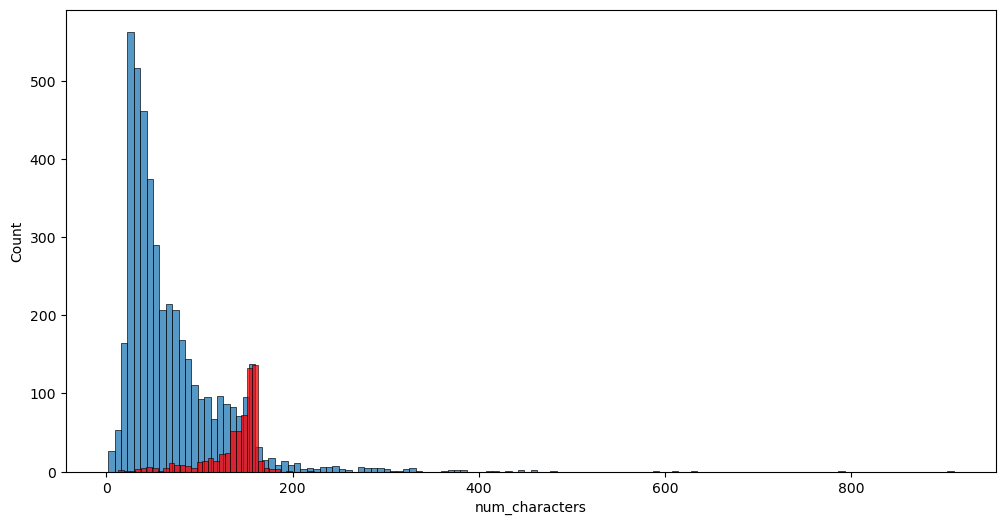

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

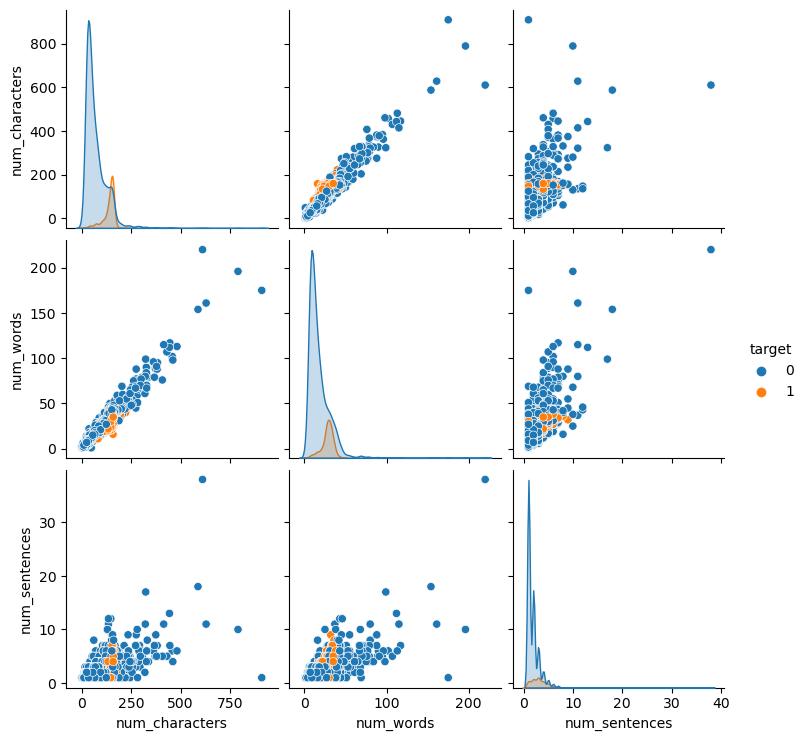

In [46]:
sns.pairplot(df,hue='target')

C:\Users\Nandni Raj\AppData\Local\Temp\ipykernel_25944\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

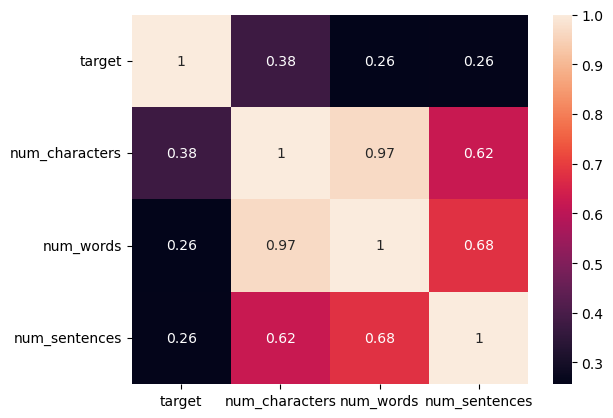

In [53]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# data Preprocessing
# lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# streaming


In [56]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)        

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [52]:
df['text'][2000]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [54]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [63]:
df['transformed_text'] = df['text'].apply(transform_text)

In [64]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB ? eta -:--:--
   ---------- ---------------------------- 81.9/299.9 kB 353.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 403.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 403.5 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/299.9 kB 388.1 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/299.9 kB 518.8 kB/s eta 0:00:01
   -------------------------

In [78]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [75]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

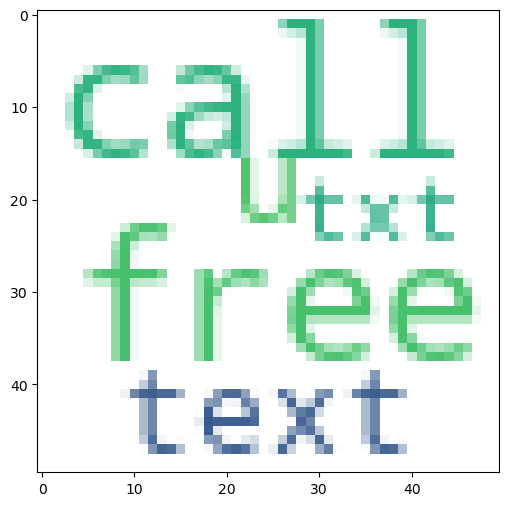

In [81]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [83]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

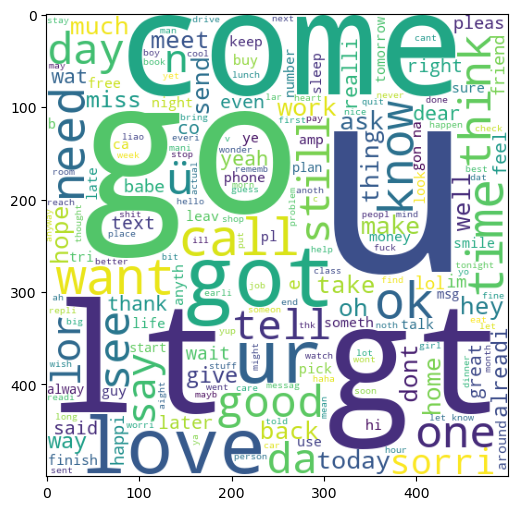

In [84]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [85]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [90]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [91]:
len(spam_corpus)

9792

In [115]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()                                                                               
                                                                               

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [107]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]


0         call
1         free
2            2
3          txt
4         text
5           ur
6            u
7        mobil
8         stop
9        repli
10       claim
11           4
12       prize
13         get
14         new
15      servic
16        send
17        tone
18      urgent
19       award
20       nokia
21     contact
22       phone
23        cash
24       pleas
25        week
26         win
27         min
28           c
29    guarante
Name: 0, dtype: object

In [108]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [109]:
len(ham_corpus)

35953

In [114]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()                                                                               
                                                                               

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
# Model Buildling

In [116]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [139]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#tfidf = TfidfVectorizer()

In [138]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [121]:
X.shape

(5159, 6789)

In [122]:
y = df['target'].values

In [123]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [124]:
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [129]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [130]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [133]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8711240310077519
[[788 121]
 [ 12 111]]
0.47844827586206895


In [40]:
mnb.fit(X_train,y_train)
y_pred2 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

NameError: name 'mnb' is not defined

In [39]:
bnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

NameError: name 'bnb' is not defined